In [1]:
import numpy as np
from scipy import misc
from IPython.display import Image
from IPython.display import display
import time

In [2]:
def computeInterCluster(R):
    iloczynySkalarne = -2*np.dot(R.T, R)
    kwadratyDlugosci = np.sum(R**2, axis=0, keepdims=True)
    iloczynySkalarne += kwadratyDlugosci
    iloczynySkalarne += kwadratyDlugosci.T

    return iloczynySkalarne

def computeIntraClusterDistances(data, C, R, I, K, N):
    swojeCentra = np.take(R, C, axis=1)
    swojeCentra -= data
    swojeCentra **= 2

    intraClusterDistances = np.sqrt(np.sum(swojeCentra, axis=0, keepdims=True))

    liczebnosc = np.zeros(K)
    intraAvg = np.zeros(K)
    intraMax = np.zeros(K)
    
    for i in range(N):
        intraAvg[C[i]] += intraClusterDistances[0][i]
        intraMax[C[i]] = max(intraClusterDistances[0][i], intraMax[C[i]])
        liczebnosc[C[i]] += 1
    
    intraAvg /= np.maximum(liczebnosc, 1)
    
    return (intraAvg, intraMax)
        
    

def KMeans(K, data, printInfo=False):
    d = np.size(data, axis=0)
    N = np.size(data, axis=1)
    I = np.eye(K)
    
    #Centra grup (losowe wektory z danych)
    #R = np.take(data, np.random.choice(np.arange(0,N), K, replace=False), axis=1)
    R = np.empty([d,K])
    choices = np.random.choice(np.arange(0,N), K, replace=False)
    for i in range(K):
        R[:,i] = data[:, choices[i]]
    #Przynależnosc do grupy (na poczatku wszyscy do zero)
    C = np.zeros((1,N), dtype=np.int64)
    macierPrzynaleznosci = None

    iteration = 0
    groupsChanged = True
    while groupsChanged:
        iteration += 1
        #Interesuje nas minimalna wartość <r,r> -2<u,r>, gdzie u to wektor z danych a r to jakies centrum
        iloczynySkalarne = -2. * np.dot(data.T, R)
        R**=2
        kwadratyDlugosciR = np.sum(R, axis=0, keepdims=True)
        iloczynySkalarne += kwadratyDlugosciR

        #Dla kazdego wektora z danych wybieramy najblizszy wektor z R i aktualizujemy grupy
        newC = np.argmin(iloczynySkalarne, axis=1)
        groupsChanged = not np.array_equal(C, newC)
        C = newC

        #Obliczamy srodki ciezkosci dla kazdej grupy
        macierzPrzynaleznosci = np.take(I, C, axis=0)
        #Sumy danych w każdej z grup
        R = np.dot(data, macierzPrzynaleznosci)
        liczebnosciGrup = np.maximum(np.sum(macierzPrzynaleznosci, axis=0, keepdims=True), 1)
        R /= liczebnosciGrup

    #Liczymy wielkosci grup, odleglosci miedzy grupami, srednie i najwieksze odleglosci w grupach
    groupSizes = np.sum(macierzPrzynaleznosci, axis=0).astype(np.int64)
    interCluster = computeInterCluster(R)
    intraClusterAvg, intraClusterMax = computeIntraClusterDistances(data, C, R, I, K, N)
    
    if printInfo:
        print("Iterations:", iteration, "\n")
        print("Group sizes:\n", groupSizes, "\n")
        print("Inter cluster distances:")
        print(interCluster, "\n")
        print("Intra cluster average distance to center\n", intraClusterAvg, "\n")
        print("Intra cluster maximum distance to center\n", intraClusterMax, "\n")
    
    return (C, R, interCluster, intraClusterAvg, intraClusterMax)

In [3]:
def unifyPhoto(photo, K):
    startTime = time.time()
    group, centers, a,b,c = KMeans(K, photo)
    endTime = time.time()
    print("KMeans took", endTime-startTime)
    result = np.empty(photo.shape)
    for i in range(photo.shape[1]):
        result[:, i] = centers[:, group[i]]
    return result.astype(np.int64)

In [4]:
def compareUnified(pathIn, pathOut, colorsCount):
    photo = misc.imread(pathIn)
    A, B, d = photo.shape
    photo = np.reshape(photo, (A*B,d)).T
    photo = unifyPhoto(photo, colorsCount).T.reshape((A,B,d))
    misc.imsave(pathOut, photo)

    before = Image(filename=pathIn) 
    after = Image(filename=pathOut)
    display(before, after)

KMeans took 5.678330183029175


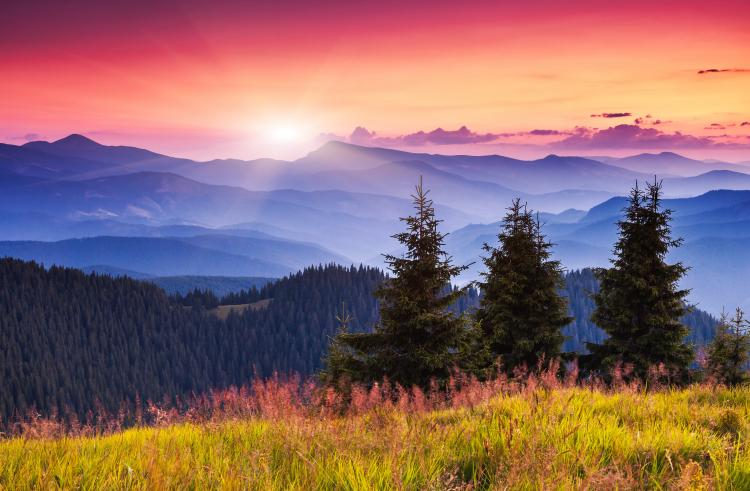

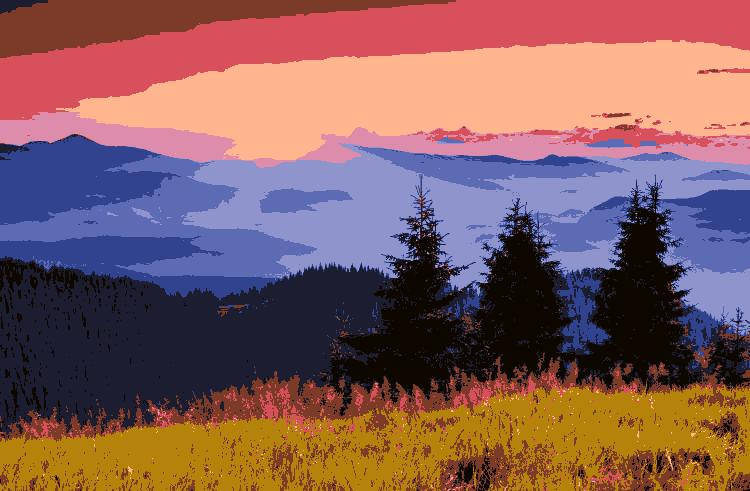

In [8]:
compareUnified("zdjecie1.jpg", "zdjecie1Po10.jpg", 10)

KMeans took 7.605546951293945


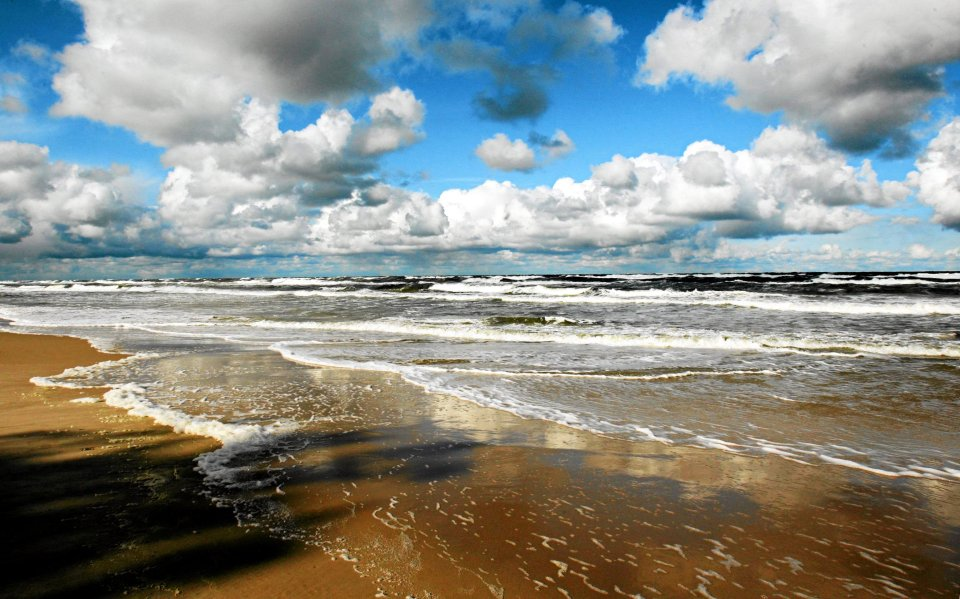

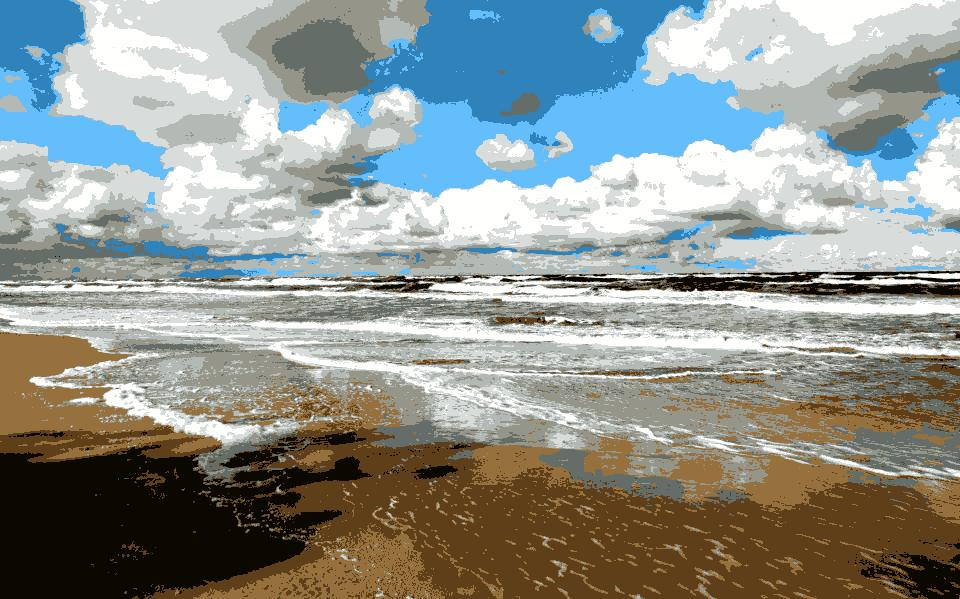

In [9]:
compareUnified("zdjecie2.jpg", "zdjecie2Po10.jpg", 10)

Iterations: 55
KMeans took 1.474236011505127


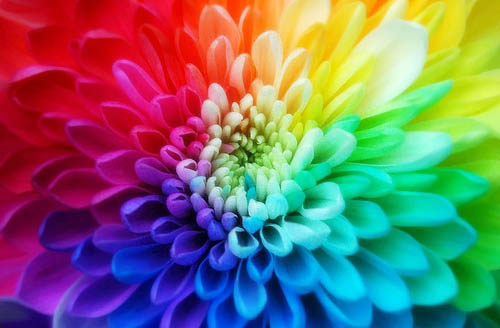

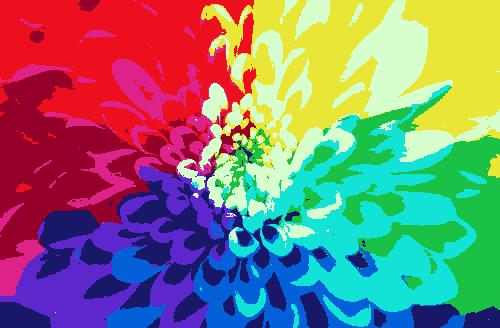

In [93]:
compareUnified("zdjecie3.jpg", "zdjecie3Po10.jpg", 10)

Iterations: 61
KMeans took 2.661398410797119


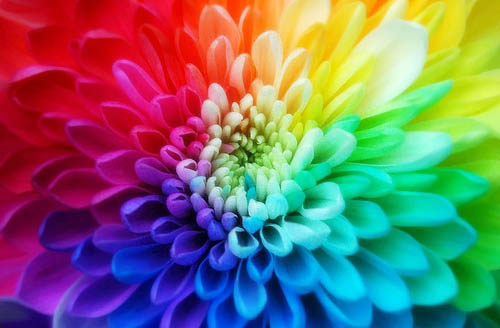

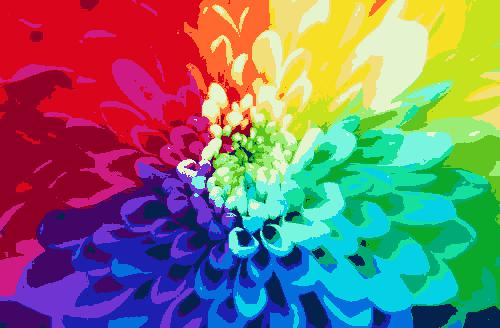

In [94]:
compareUnified("zdjecie3.jpg", "zdjecie3Po20.jpg", 20)

Iterations: 203
KMeans took 21.99471688270569


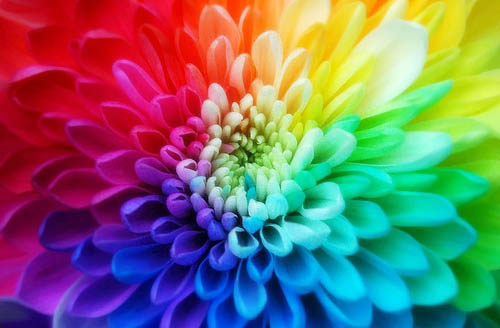

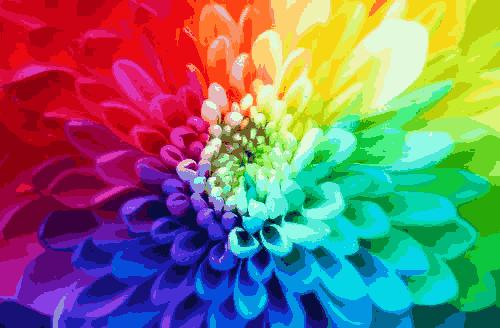

In [95]:
compareUnified("zdjecie3.jpg", "zdjecie3Po50.jpg", 50)

Iterations: 148
KMeans took 34.4502055644989


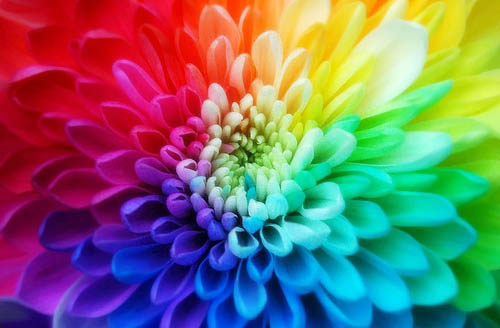

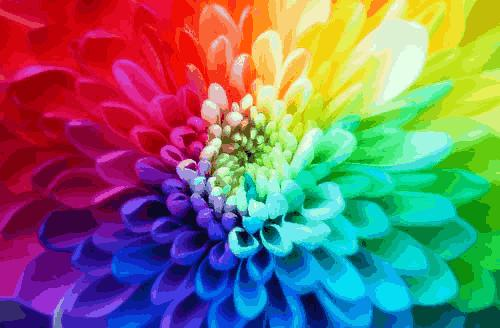

In [96]:
compareUnified("zdjecie3.jpg", "zdjecie3Po100.jpg", 100)

KMeans took 17.040433406829834


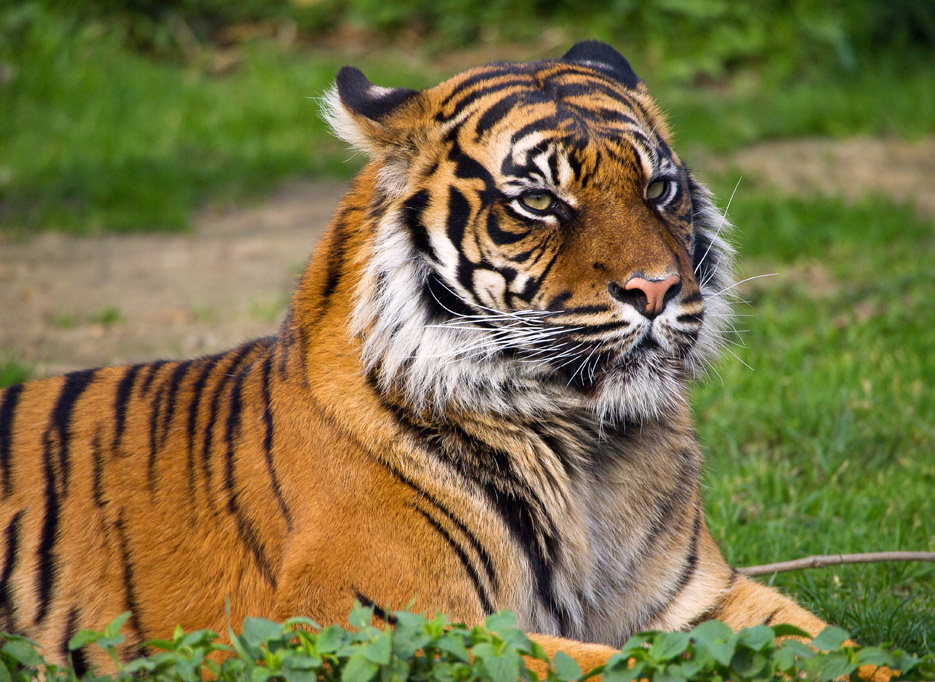

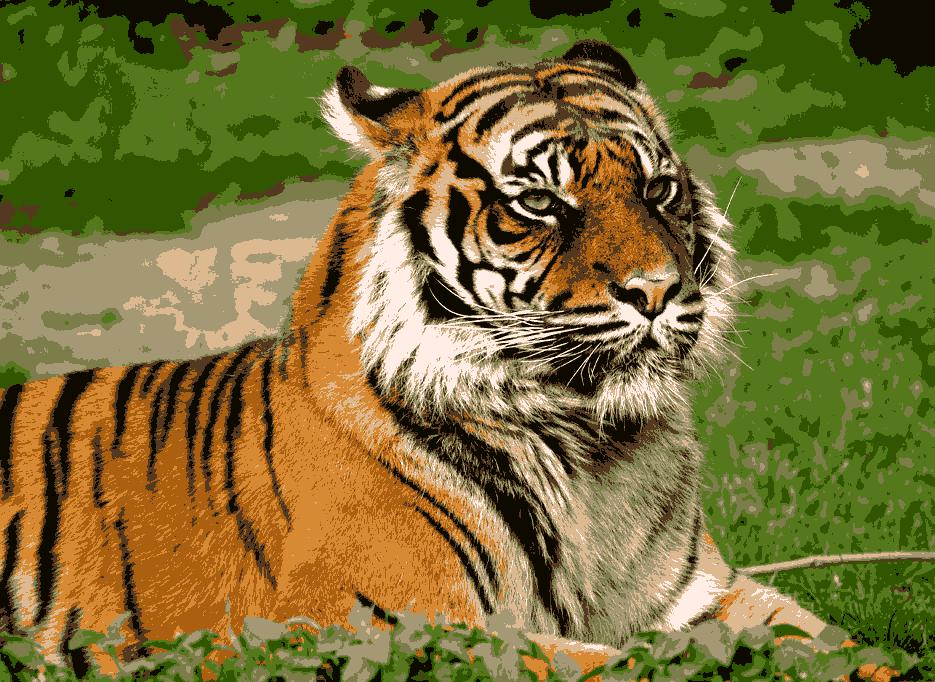

In [7]:
compareUnified("zdjecie4.jpg", "zdjecie4Po10.jpg", 10)

Iterations: 81
KMeans took 9.985251903533936


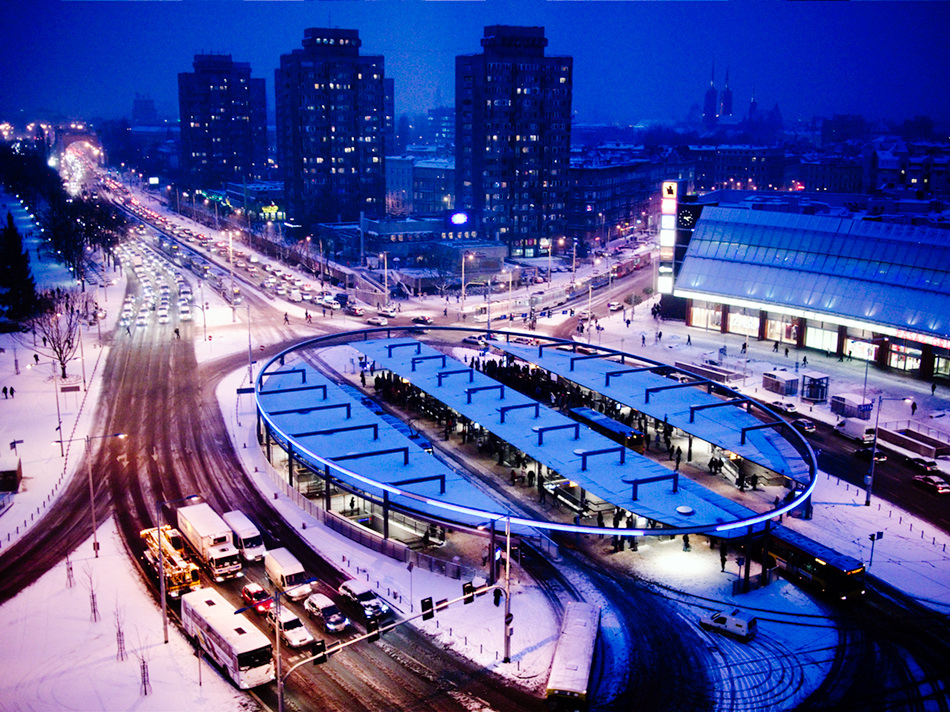

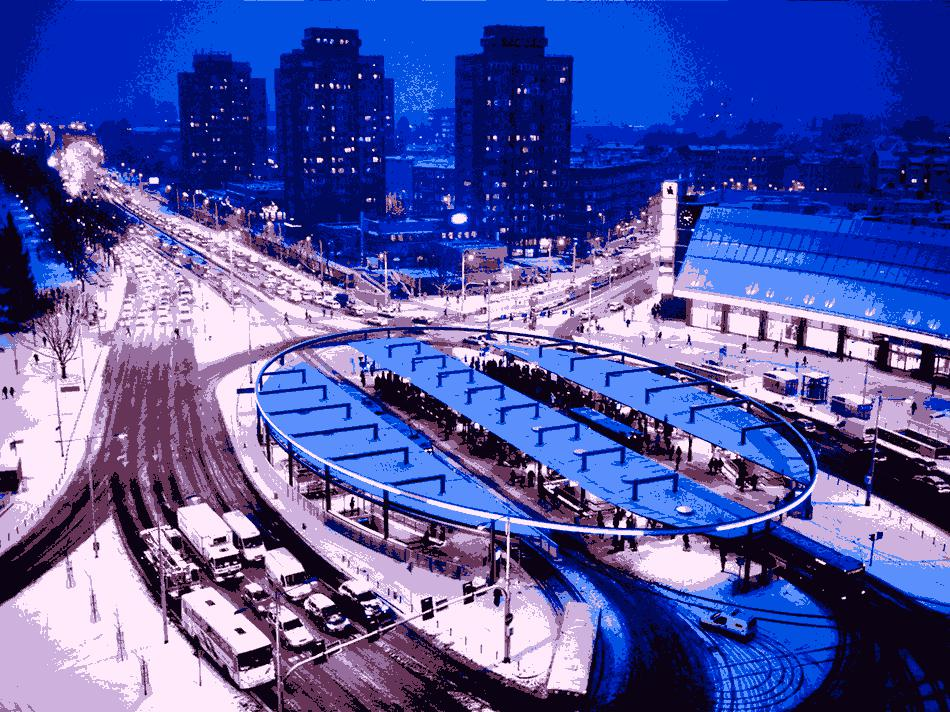

In [103]:
compareUnified("zdjecie5.jpg", "zdjecie5Po20.jpg", 10)

Iterations: 260
KMeans took 53.01118302345276


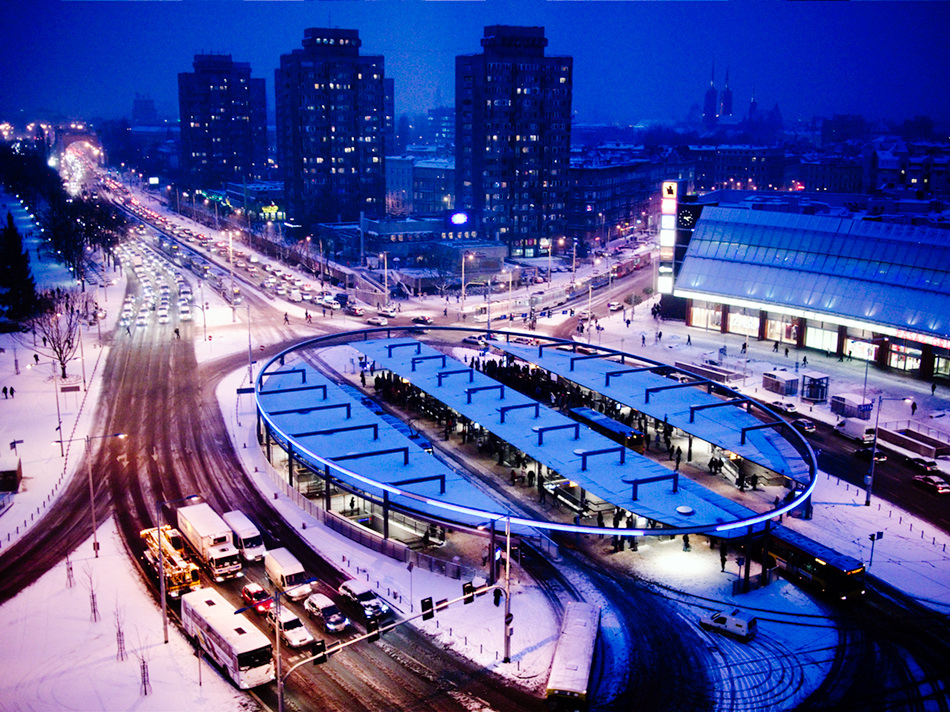

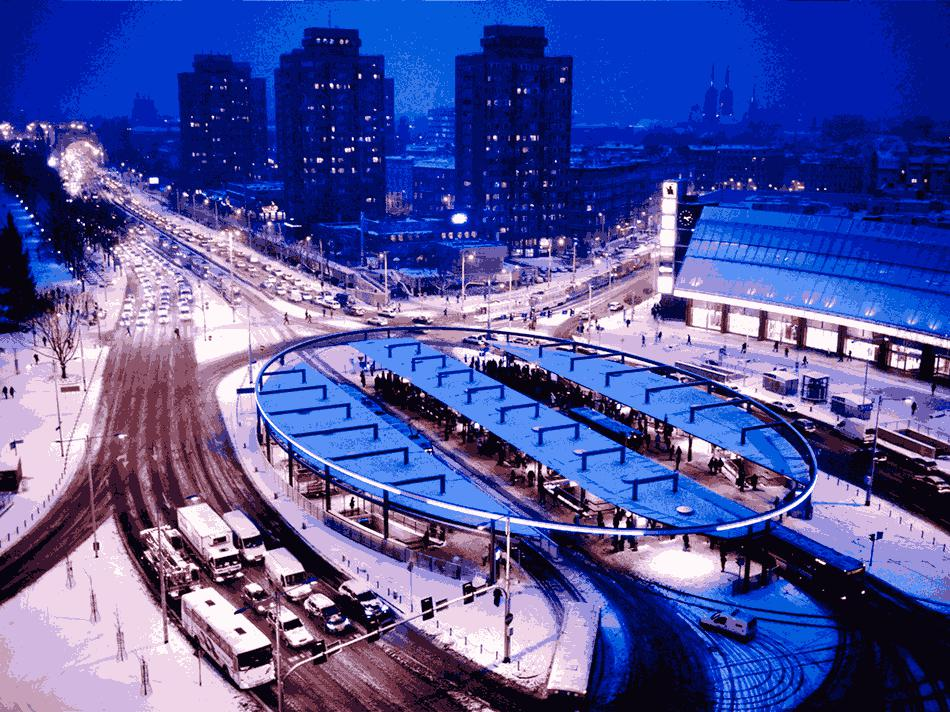

In [100]:
compareUnified("zdjecie5.jpg", "zdjecie5Po20.jpg", 20)